# Révision 3 : analyse exploratoire des données

<img src="https://cdn.pixabay.com/photo/2017/07/22/11/46/adventure-2528477_1280.jpg" alt="carte" width="400"/>

*Source : Image par MasterTux de Pixabay*

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## Analyse statistique simple et nettoyage

- Récupération du **dataset du Titanic** : https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/titanic.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/titanic.csv"
df = pd.read_csv(url, index_col="PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Analyse des **valeurs manquantes**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

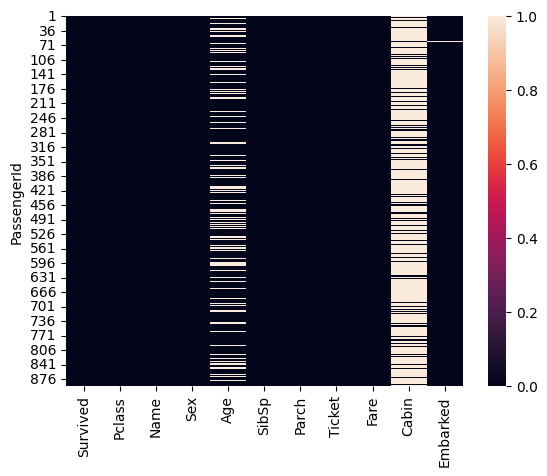

In [7]:
sns.heatmap(df.isna())
plt.show()

- Analyse des **corrélations** entre **grandeurs quantitatives**

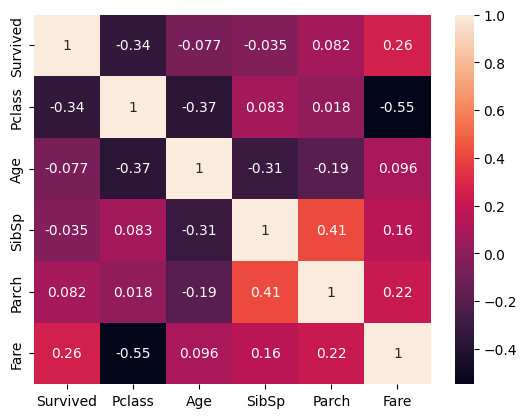

In [15]:
# Corrélation de Pearson
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True)
plt.show()

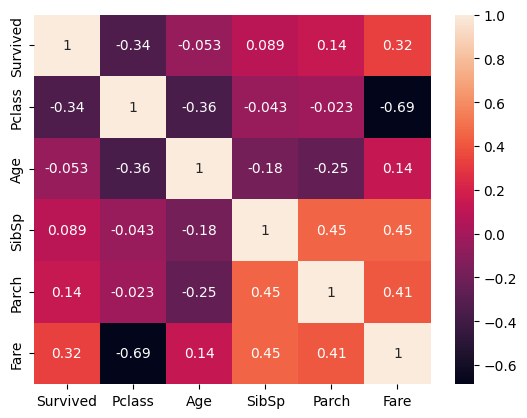

In [16]:
# Corrélation de Spearman
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)
plt.show()

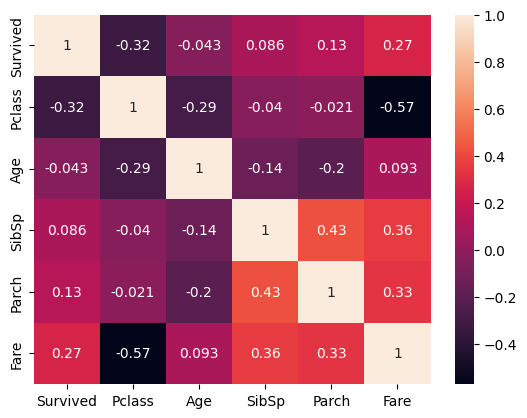

In [17]:
# Corrélation de Kendall
sns.heatmap(df.corr(method='kendall', numeric_only=True), annot=True)
plt.show()

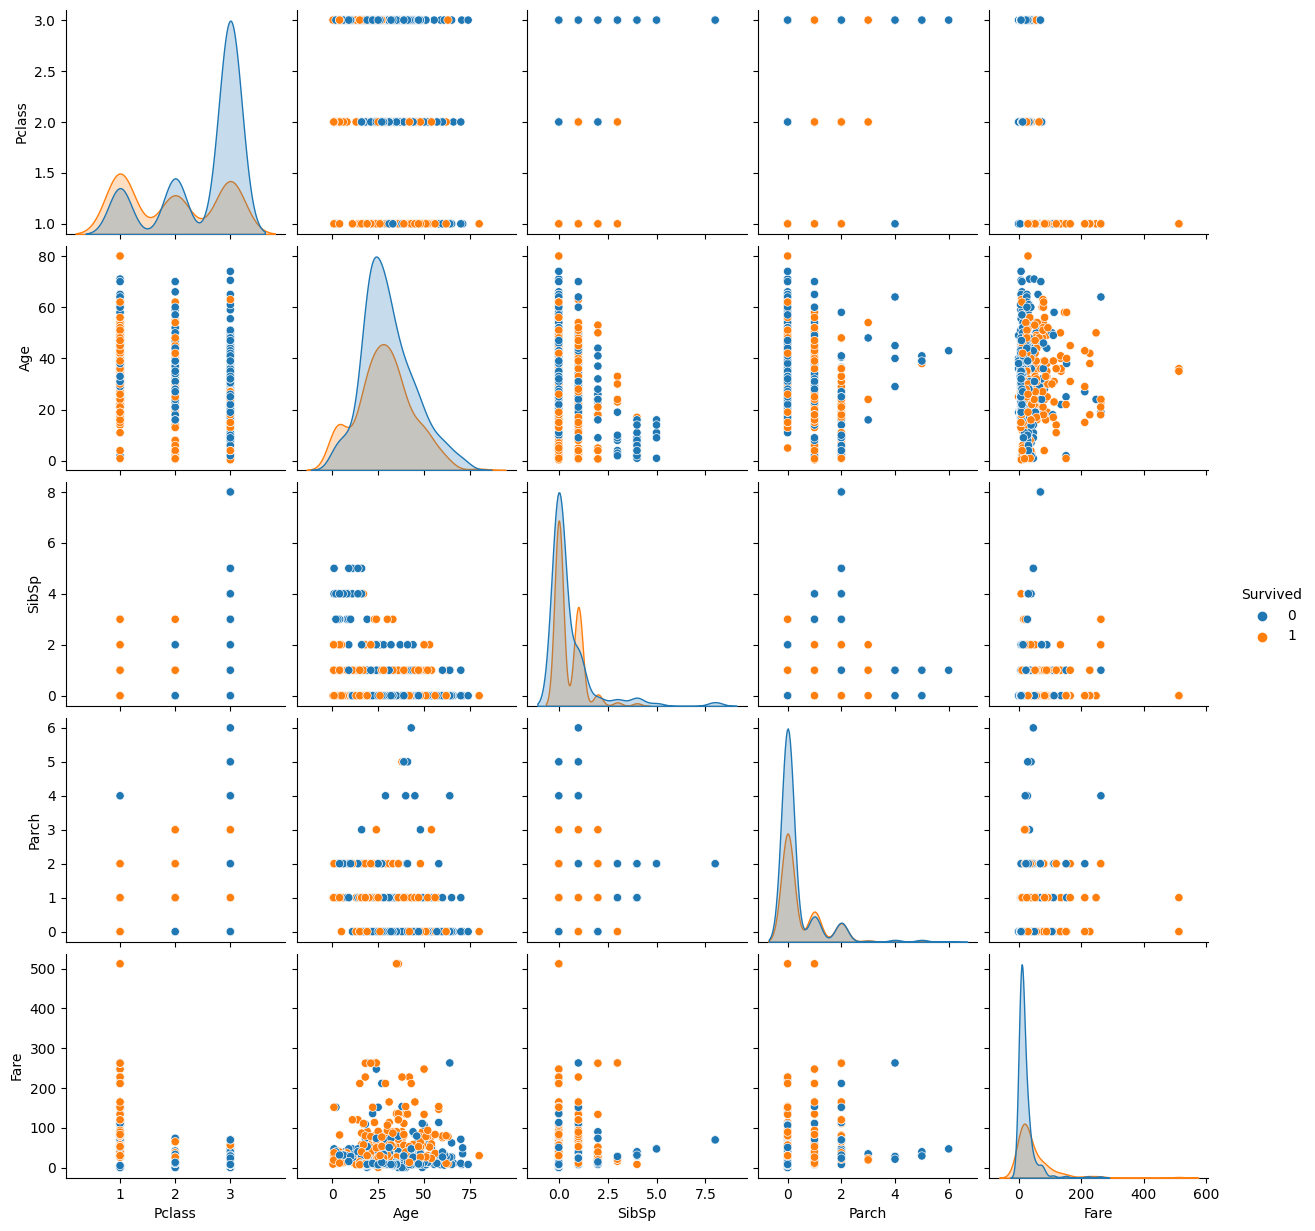

In [18]:
sns.pairplot(df.select_dtypes(include=["float64", "int64"]), hue="Survived")
plt.show()

- Analyse des **corrélations** entre **grandeurs qualitatives**

In [19]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [20]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(pd.crosstab(df["Survived"], df["Pclass"]))
v_cramer = association(pd.crosstab(df["Survived"], df["Pclass"]), method="cramer")
print(f"P-value pour le lien entre 'Survived' et 'Pclass' :  {pval}")
print(f"V de Cramer pour le lien entre 'Survived' et 'Pclass' :  {v_cramer}")

P-value pour le lien entre 'Survived' et 'Pclass' :  4.549251711298793e-23
V de Cramer pour le lien entre 'Survived' et 'Pclass' :  0.33981738800531175


In [21]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(pd.crosstab(df["Survived"], df["Sex"]))
v_cramer = association(pd.crosstab(df["Survived"], df["Sex"]), method="cramer")
print(f"P-value pour le lien entre 'Survived' et 'Sex' :  {pval}")
print(f"V de Cramer pour le lien entre 'Survived' et 'Sex' :  {v_cramer}")

P-value pour le lien entre 'Survived' et 'Sex' :  1.1973570627755645e-58
V de Cramer pour le lien entre 'Survived' et 'Sex' :  0.5433513806577551


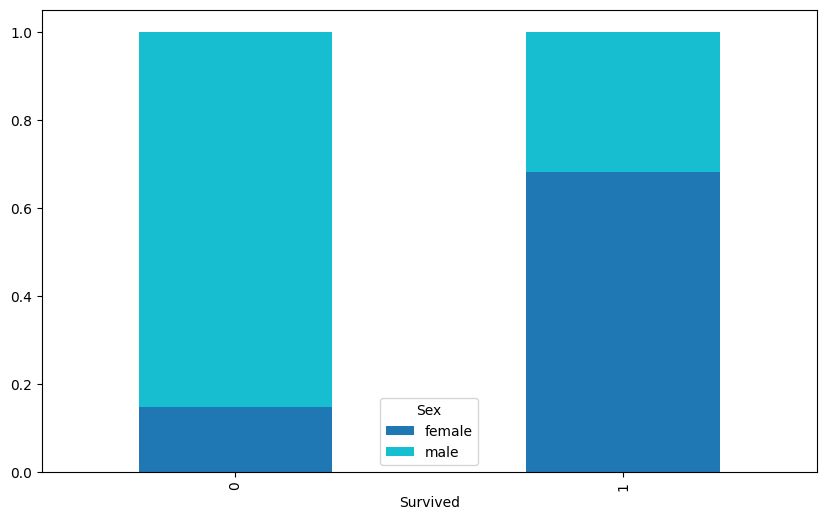

In [22]:
cross = pd.crosstab(df["Survived"], df["Sex"])
cross = cross.div(cross.sum(axis=1), axis=0)
cross.plot(
    kind='bar', stacked=True, colormap='tab10', figsize=(10, 6),
)
plt.show()

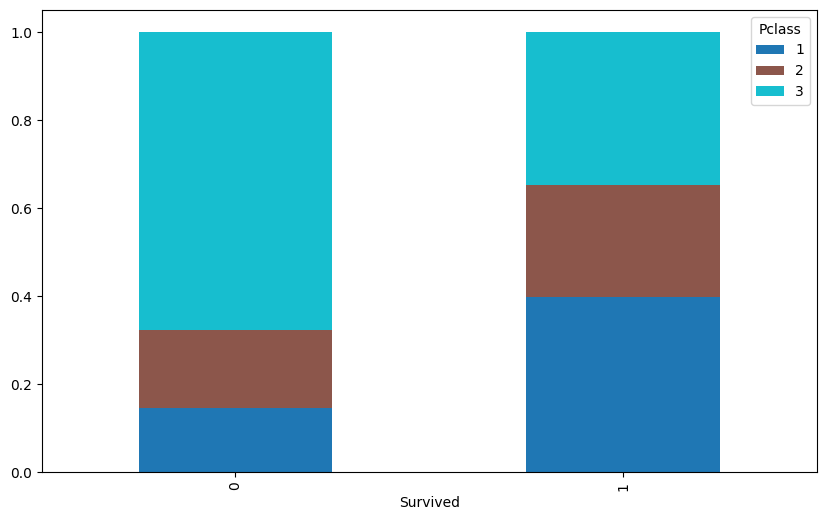

In [23]:
cross = pd.crosstab(df["Survived"], df["Pclass"])
cross = cross.div(cross.sum(axis=1), axis=0)
cross.plot(
    kind='bar', stacked=True, colormap='tab10', figsize=(10, 6),
)
plt.show()

- Analyse des **corrélations** entre une **grandeur qualitative** et une **grandeur quantitative**

In [24]:
from scipy import stats

In [25]:
kstat, pval = stats.kruskal(*[group["Fare"].values for name, group in df.groupby("Pclass")])
kstat, pval

(438.0437034212556, 7.586096900646798e-96)

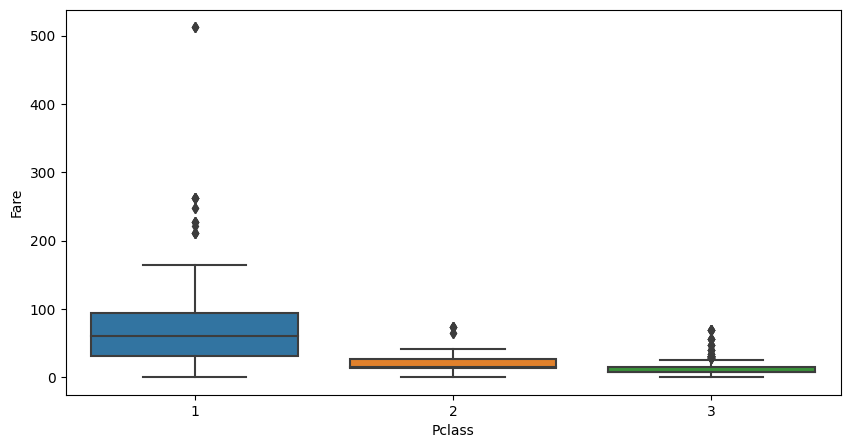

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Pclass", y="Fare")
#plt.yscale("log")
plt.show()

- Traitement des **valeurs manquantes**

In [27]:
# Trop de valeurs manquantes
df = df.drop("Cabin", axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [28]:
# Très peu de valeurs manquantes : imputation par le mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [29]:
# Beaucoup de valeurs manquantes mais colonne intéressante
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
num_df = df.select_dtypes(include=["int64", "float64"])
num_df = pd.DataFrame(imp_mean.fit_transform(num_df), columns=num_df.columns)
num_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,23.259681,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [30]:
num_df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Nettoyage des données aberrantes (outliers)

- **Analyse graphique** des données aberrantes

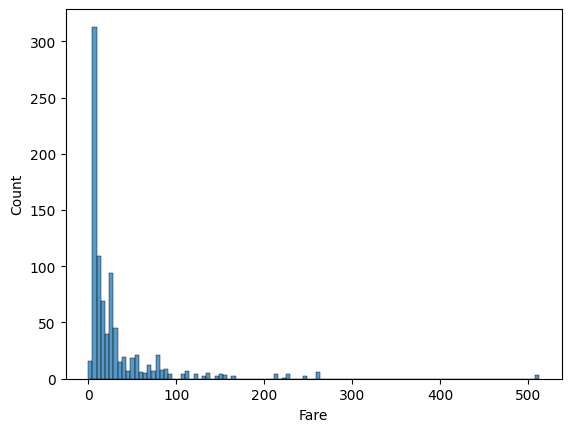

In [31]:
sns.histplot(data=df, x="Fare")
plt.show()

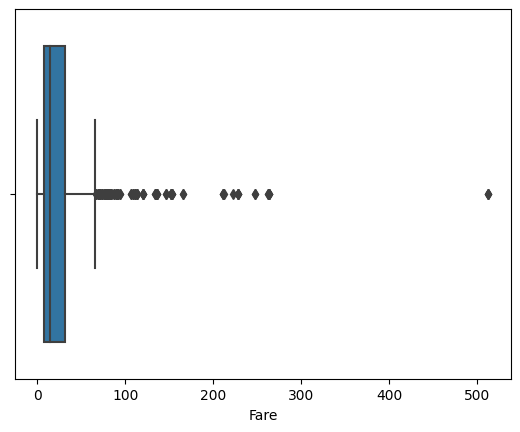

In [32]:
sns.boxplot(data=df, x="Fare")
plt.show()

- **Analyse statistique** des données aberrantes

In [33]:
#z-score
df[((df["Fare"]-df["Fare"].mean())/df["Fare"].std()).abs()>3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C


In [34]:
# IQR
iqr = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
display(df[df["Fare"] < df["Fare"].quantile(0.25) - 1.5*iqr], df[df["Fare"] > df["Fare"].quantile(0.75) + 1.5*iqr])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


## Analyse en composantes principales

- **Standardisation** des donnéees

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_df)

- Calcul des **composantes principales**

In [37]:
pca = PCA()
pca.fit(data_scaled)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:3]))

[0.31483059 0.29174171 0.15463875 0.10526705 0.08109682 0.05242508]
0.7612110453320104


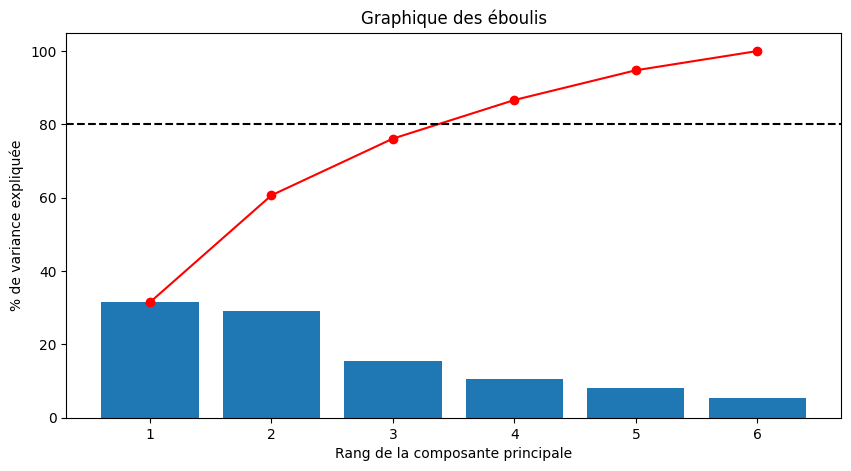

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, num_df.shape[1]+1), height=pca.explained_variance_ratio_*100)
plt.plot(range(1, num_df.shape[1]+1), (pca.explained_variance_ratio_*100).cumsum(), c="red", marker='o')
plt.axhline(y=80, color='black', linestyle='--')
plt.title("Graphique des éboulis")
plt.ylabel("% de variance expliquée")
plt.xlabel("Rang de la composante principale")
plt.show()

- Affichage du **cercle des corrélations**

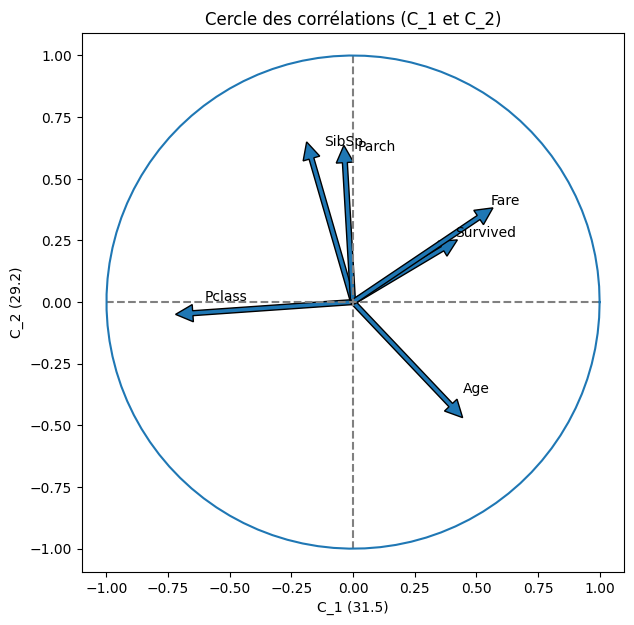

In [39]:
fig, ax = plt.subplots(figsize=(7, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Fléche à l'origine
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             num_df.columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel(f'C_1 ({round(100*pca.explained_variance_ratio_[0], 1)})')
plt.ylabel(f'C_2 ({round(100*pca.explained_variance_ratio_[1], 1)})')
plt.title("Cercle des corrélations (C_1 et C_2)")

# Ajout du cercle unité
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)

## 🏅 Exercice bilan

- Effectuer un **analyse en composantes principales (ACP)** pour le jeu de données des pingouins : https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/penguins.csv

In [45]:
url = "https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/penguins.csv"
df = pd.read_csv(url)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


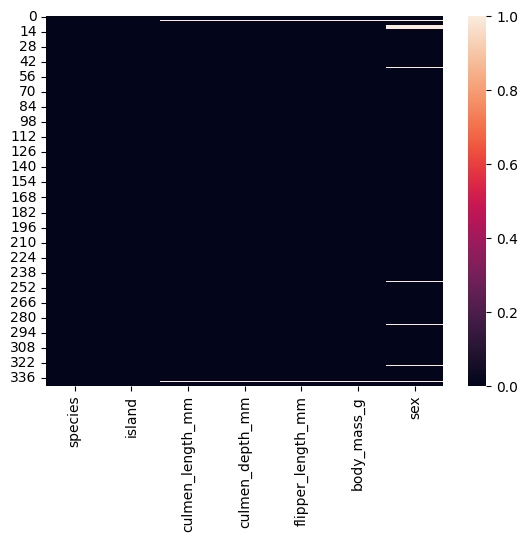

In [46]:
sns.heatmap(df.isna())
plt.show()

In [47]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [48]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [49]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [50]:
useful_col = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[useful_col].fillna(df[useful_col].median())
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,44.45,17.3,197.0,4050.0
340,46.80,14.3,215.0,4850.0
341,50.40,15.7,222.0,5750.0
342,45.20,14.8,212.0,5200.0


In [51]:
df[useful_col].median()

culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [52]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [53]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [54]:
pca = PCA()
pca.fit(data_scaled)
print(pca.explained_variance_ratio_)

[0.68837221 0.19313603 0.09136061 0.02713115]


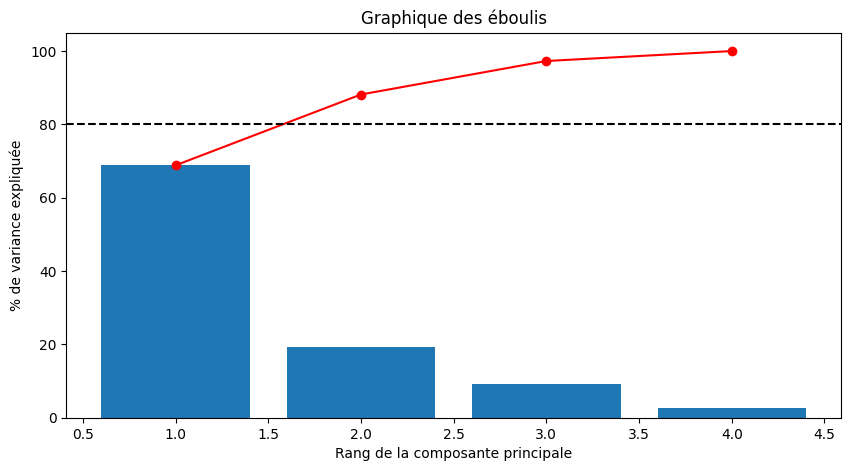

In [55]:
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, df.shape[1]+1), height=pca.explained_variance_ratio_*100)
plt.plot(range(1, df.shape[1]+1), (pca.explained_variance_ratio_*100).cumsum(), c="red", marker='o')
plt.axhline(y=80, color='black', linestyle='--')
plt.title("Graphique des éboulis")
plt.ylabel("% de variance expliquée")
plt.xlabel("Rang de la composante principale")
plt.show()

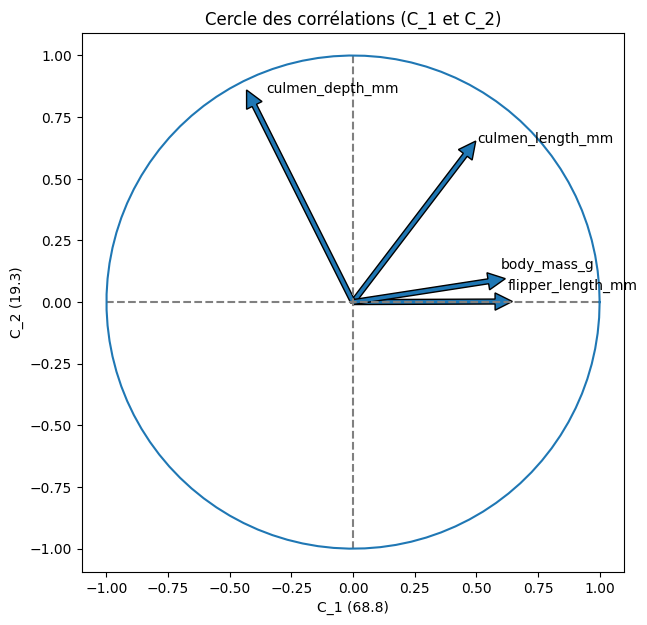

In [56]:
fig, ax = plt.subplots(figsize=(7, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Fléche à l'origine
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel(f'C_1 ({round(100*pca.explained_variance_ratio_[0], 1)})')
plt.ylabel(f'C_2 ({round(100*pca.explained_variance_ratio_[1], 1)})')
plt.title("Cercle des corrélations (C_1 et C_2)")

# Ajout du cercle unité
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)